Name: Dheeraj Kumar Ambedkar  \n
School: CDS  \n

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import os
from google.colab import drive

2.17.1


In [ ]:
import os
import glob
import PIL
from PIL import Image

In [ ]:
from google.colab import drive
import glob

# Mount Google Drive
drive.mount('/content/drive')






Mounted at /content/drive


In [ ]:
# Load the saved data from Google Drive
X_train_std = np.load("/content/drive/MyDrive/Processed_data/X_train_std.npy")
y_train = np.load("/content/drive/MyDrive/Processed_data/y_train.npy")
X_test_std = np.load("/content/drive/MyDrive/Processed_data/X_test_std.npy")
y_test = np.load("/content/drive/MyDrive/Processed_data/y_test.npy")
y = np.load("/content/drive/MyDrive/Processed_data/y.npy")

In [ ]:
# Load the saved best model

model2_FineTune = keras.models.load_model('/content/drive/MyDrive/Models/ResNet50V2_TransferLearning_Best_Model.h5')

In [ ]:
model2_FineTune.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, None, None, 64) │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, None, None, 64) │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, None, None, 64) │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,579,141 (89.95 MB)

 Trainable params: 23,529,603 (89.76 MB)

 Non-trainable params: 49,536 (193.50 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
x = 0
for layer in model2_FineTune.layers[:]:
  x = x+1
print(x)

194


In [ ]:
# Fine-tune the model from index 60 onwards

for layer in model2_FineTune.layers[:35]:
  layer.trainable = False

for layer in model2_FineTune.layers[35:]:
  layer.trainable = True

In [ ]:
model2_FineTune.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FineTune = [
             keras.callbacks.ModelCheckpoint("bestFT_1.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FineTune = model2_FineTune.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 461s 15s/step - accuracy: 0.9820 - loss: 0.0589 - val_accuracy: 0.5200 - val_loss: 2312.1064
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 432s 15s/step - accuracy: 0.9225 - loss: 0.2181 - val_accuracy: 0.5200 - val_loss: 1152.4155
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 419s 15s/step - accuracy: 0.9839 - loss: 0.0560 - val_accuracy: 0.5000 - val_loss: 34.3569
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 421s 15s/step - accuracy: 0.9867 - loss: 0.0423 - val_accuracy: 0.5600 - val_loss: 36.7325
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 456s 16s/step - accuracy: 0.9968 - loss: 0.0180 - val_accuracy: 0.6000 - val_loss: 25.3343
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 420s 15s/step - accuracy: 0.9929 - loss: 0.0161 - val_accuracy: 0.9800 - val_loss: 0.4887
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 447s 15s/step - accuracy: 0.9938 - loss: 0.0145 - val_accuracy: 0.5600 - val_loss: 56.1337
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 441s 15s/step - accuracy: 0.9911 - loss: 0.0372 - val_ac

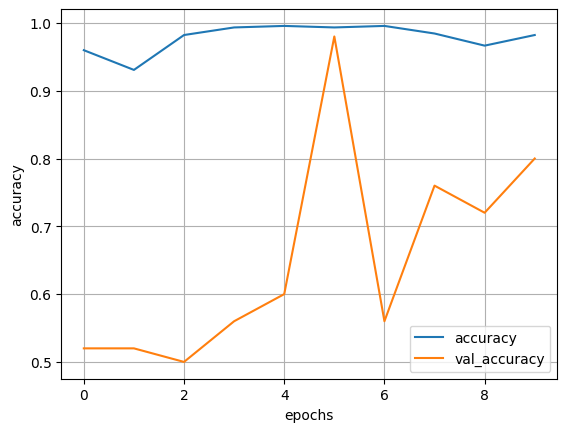

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
testLoss_FineTune, testAccuracy_FineTune = model2_FineTune.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

6/6 ━━━━━━━━━━━━━━━━━━━━ 63s 8s/step - accuracy: 0.8105 - loss: 7.0197
Test-loss: 7.517330, Test-accuracy: 0.819277


In [ ]:
model2_FineTune.load_weights("bestFT_1.weights.h5")

testLoss_FineTune, testAccuracy_FineTune = model2_FineTune.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

6/6 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.9262 - loss: 0.3837
Test-loss: 0.506792, Test-accuracy: 0.915663


In [ ]:
Proba = model2_FineTune.predict(X_test_std[:1])

print(Proba)

cLabel = np.argmax(Proba, axis=-1)

print(cLabel)

print(y_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[1. 0. 0.]]
[0]
[0]


In [ ]:
y_proba = model2_FineTune.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

6/6 ━━━━━━━━━━━━━━━━━━━━ 56s 8s/step
[0 0 0 0 1 1 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 2 0 1
 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 2 0 0 0 0 2
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 1 1 0 1 2 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 2 1 1 1 0 0 0 0 0
 0 1 2 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[74,  0,  1],
       [ 3, 72,  0],
       [ 8,  2,  6]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.9155504598452864
Recall:  0.9156626506024096
F1-score:  0.9048557082136542






In [ ]:
# Saves the best model obtained
model2_FineTune.save('/content/drive/MyDrive/Models/ResNet50V2_FineTuning_Best_Model.h5')